# Free energies and mutual info priors

In [1]:
%matplotlib inline
import pandas as pd
from tramp.experiments import qplot

In [2]:
# FIXME modulus
#%run likelihood_free_energies.py

In [3]:
df = pd.read_csv("likelihood_free_energies.csv")

## Likelihoods

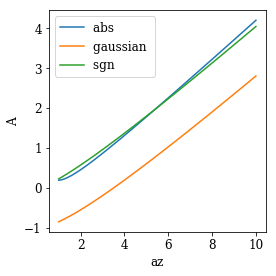

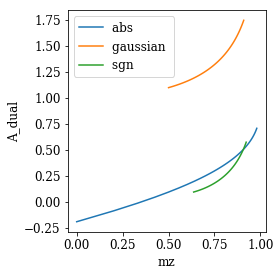

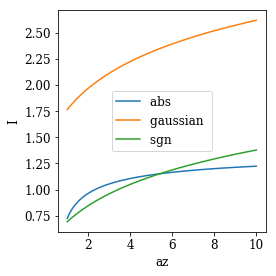

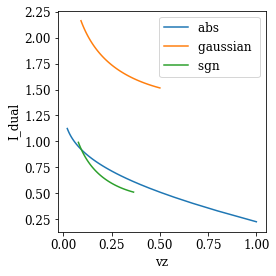

In [4]:
rename = {"likelihood_type=":""}
qplot(df,  x="az", y="A", color="likelihood_type", rename=rename)
qplot(df,  x="mz", y="A_dual", color="likelihood_type", rename=rename)
qplot(df,  x="az", y="I", color="likelihood_type", rename=rename)
qplot(df,  x="vz", y="I_dual", color="likelihood_type", rename=rename)

## Check I-MMSE and A-overlap

In [5]:
def check_gradient(subset):
    check = df.query(subset).sort_values(by="az")
    check["I_prime"] = 2 * check["I"].diff() / check["az"].diff()
    check["A_prime"] = 2 * check["A"].diff() / check["az"].diff()
    qplot(
        check, x="az", y=["vz", "mz", "I_prime", "A_prime"], 
        y_markers=["-", "-", "--", "--"], y_legend=True
    )

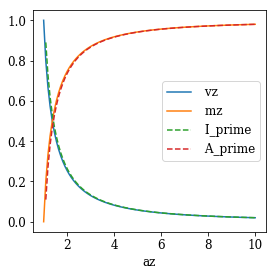

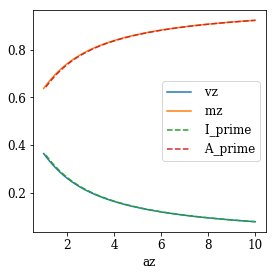

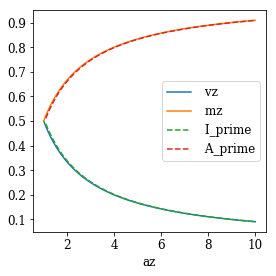

In [6]:
check_gradient("likelihood_type=='abs'")
check_gradient("likelihood_type=='sgn'")
check_gradient("likelihood_type=='gaussian'")

## Check dual 

In [7]:
def check_reverse(subset):
    check = df.query(subset).sort_values(by="vz")
    check["I_dual_prime"] = -2 * check["I_dual"].diff() / check["vz"].diff()
    check["A_dual_prime"] = 2 * check["A_dual"].diff() / check["mz"].diff()
    qplot(
        check, x="mz", y=["az", "I_dual_prime", "A_dual_prime"], 
        y_markers=["-", "--", "-."], y_legend=True
    )

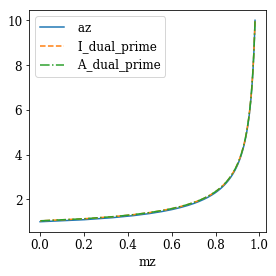

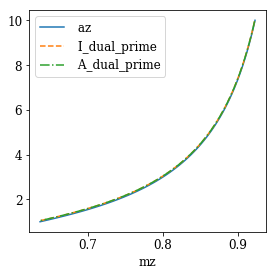

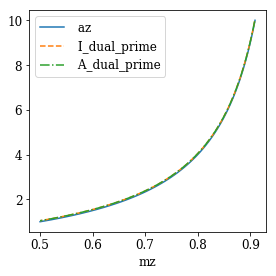

In [8]:
check_reverse("likelihood_type=='abs'")
check_reverse("likelihood_type=='sgn'")
check_reverse("likelihood_type=='gaussian'")